# TD8 : Puissance d'un test statistique

Christelle Gonindard, Margaux Leroy et François Bettega


## 1. Contexte :

Un test statistique est une procédure de décision entre deux hypothèses. Il s’agit de statistique
inférentielle : à partir de calculs réalisés sur des données observées, nous émettons des
conclusions sur la population, en leur rattachant des risques de se tromper.
Le tableau suivant met en évidence les deux risques d’erreur possibles :

<img src="Figures/TD1_17.jpeg" />

Dans cette partie, nous proposons de tester l’influence de la taille des échantillons et des
conditions initiales sur les risques d’erreur $\alpha$ et $\beta$ lors du test de Student de comparaison de deux
échantillons indépendants.

## 2. Risque d'erreur de première espèce 

Il représente la probabilité d’adopter l’hypothèse alternative H1 alors qu’en réalité l’hypothèse
nulle H0 est vraie :

$$ \alpha = P(\textrm{rejet de }H_0 | H_0 \textrm{ vraie})$$ 

Lors d’un test, l’expérimentateur est entièrement libre de fixer la limite supérieure de ce
risque d’erreur appelée niveau ou seuil de significativité et généralement noté $\alpha$.

Cependant l’usage a consacré comme seuils habituels : 0.05 ou 5 % et 0.01 ou 1 %. Nous le
fixerons ici à 0.05.

Nous allons simuler deux populations qui ont un taux de cholestérol moyen de 1.6 mg/L avec
un écart-type de 0.4 mg/L qui suivent deux lois différentes :
- une population A suit une loi normale
- une population B suit une loi exponentielle


Nous allons simuler également deux autres populations qui ont un taux de cholestérol moyen de
2 mg/L avec un écart-type de 0.4 mg/L qui suivent deux lois différentes :
- une population C suit une loi normale
- une population D suit une loi exponentielle

Ensuite à partir de ces deux populations, nous extrairons dans un premier temps deux échantillons
indépendants A1 et A2 da la population A que nous comparerons avec un test de Student
puis deux échantillons indépendants B1 et B2 de la population B que nous comparerons également
avec un test de student . Les échantillons appartenant à la même population le test de
student devrait avoir une pvalue supérieure à 0.05 correspondant à l’hypothèse H0.
Nous répèterons cette expérience 1000 fois sur des échantillons de petites tailles puis de tailles
plus grandes. Pour faciliter ce travail, le code de la fonction vous ai donnée ci-dessous :  



 

In [1]:
# Partie contenant la programmation de la fonctin de comparaison d'échantillon par un stest de Student
# Il vous suffit de copier coller ce script dans votre console R studio et de la faire exécuter

check.test = function(test,samplesize,sampledist1,sampledist2,count) 
{
  resultat <- rep(0,count)
  for (i in 1:count) 
    resultat[i] <- test(sampledist1(samplesize),sampledist2(samplesize))
  resultat
}

t.test.pvalue = function(x,y) t.test(x,y)$p.value

normalea_egale = function(x) rnorm(x,1.6,0.4)
normalea_different = function(x) rnorm(x,2,0.4)


expalea_egale = function(x) rexp(x,1/1.6)
expalea_different = function(x) rexp(x,1/2)


graph_pvalue=function(taille_echantillon,echantillon,nombre_loi_simuler,loi_echantillon)
{
  if(echantillon=="egaux" & loi_echantillon=="normale")
    plot(factor(check.test(t.test.pvalue,taille_echantillon,normalea_egale,normalea_egale,nombre_loi_simuler) > 0.05),main="Echantillons égaux, loi Normale")
  if(echantillon=="different" & loi_echantillon=="normale")
    plot(factor(check.test(t.test.pvalue,taille_echantillon,normalea_egale,normalea_different,nombre_loi_simuler) > 0.05),main="Echantillons différents, loi Normale")
  if(echantillon=="egaux" & loi_echantillon=="exponentielle")
    plot(factor(check.test(t.test.pvalue,taille_echantillon,expalea_egale,expalea_egale,nombre_loi_simuler) > 0.05),main="Echantillons égaux, loi exponentielle")
  if(echantillon=="different" & loi_echantillon=="exponentielle")
    plot(factor(check.test(t.test.pvalue,taille_echantillon,expalea_egale,expalea_different,nombre_loi_simuler) > 0.05),main="Echantillons différents, loi exponentielle")
     }




La fonction *graph_pvalue* qui réalise une série de tests de Student sur plusieurs échantillons et qui
renvoie un graphique représentant les décisions prises par le test. Cette fonction accepte trois
arguments :

*graph_pvalue(taille échantillon; "egaux ou différent"; nombre de loi simulée; "loi")*

- **taille_echantillon** : la taille des échantillons qui vont être extraits
- **échantillons extrait d’une même population ou pas** : le terme egaux correspond à deux
échantillons extraits d’une même population et différent correspond à deux échantillons
extrait de deux populations différentes mais de même loi
- **nombre_loi_simuler** : nombre d’échantillons extraits, ce qui correspond aux nombres
de tests de Student que l’on effectuera
- **loi :** la loi de la population choisie, elle peut prendre les valeurs "normale" ou "exponentielle"

La colonne FALSE présente sur le graphique indique le nombre de fois que l’on rejette H0 et la
colonne TRUE indique le nombre de fois où H0 ne peut pas être rejetée.

**Premier exemple** : Simulons 1000 couples de deux échantillons appartenant à une même
population, de grandes tailles (n=100) et suivant une loi normale ou une loi exponentielle



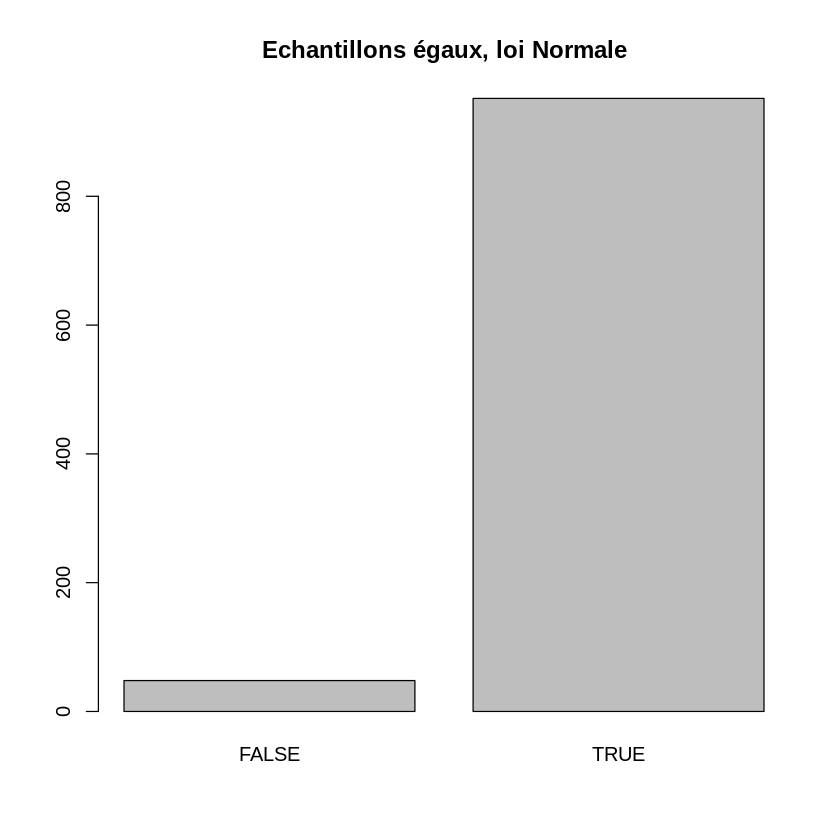

In [2]:
# Simulation de 1000 couples d'échantillons de taille 100 suivant 
# une loi normale
graph_pvalue(100,"egaux",1000,"normale")

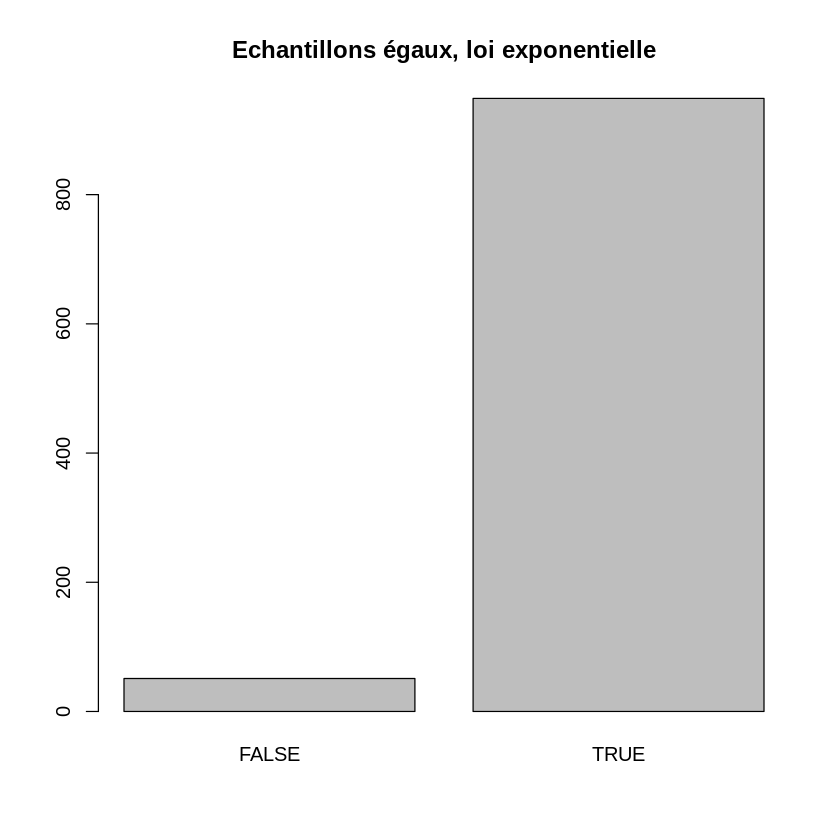

In [3]:
# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi exponentielle
graph_pvalue(100,"egaux",1000,"exponentielle")

On remarque quand dans les deux cas, que ce soit pour des échantillons suivant une loi normale
ou pour des échantillons suivant une loi exponentielle l’hypothèse H0 est très rarement
rejetée (colonne False).


**Deuxième exemple** : Simulons 1000 couples de deux échantillons appartenant à une même
population, de petite taille (n=5), suivant une loi normale ou une loi exponentielle

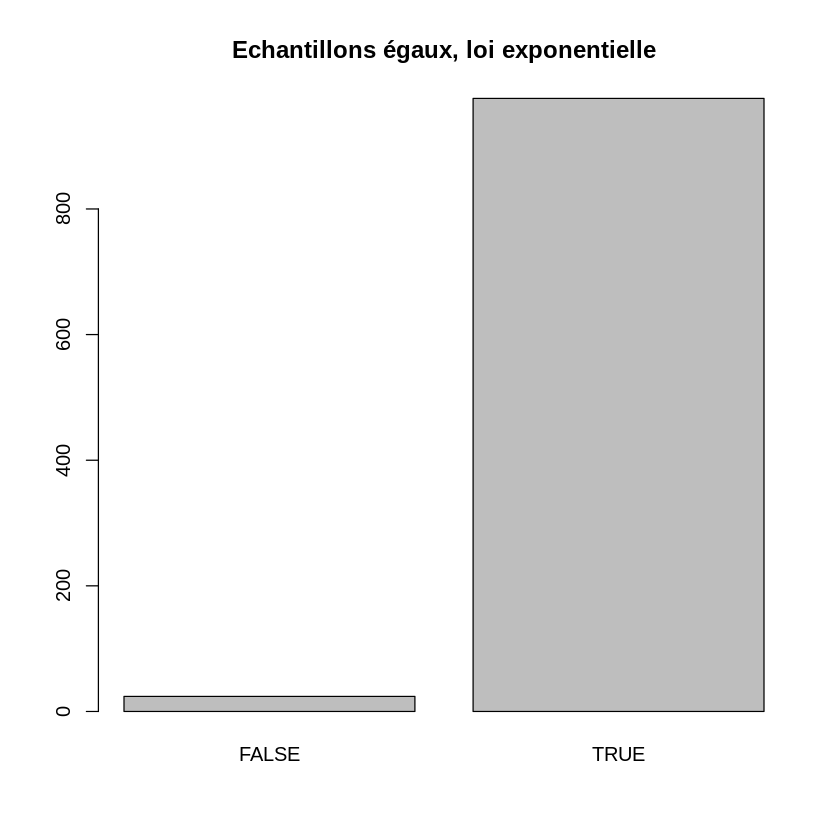

In [4]:
# Simulation de 1000 couples d'échantillons de taille 100 suivant 
# une loi normale
graph_pvalue(5,"egaux",1000,"normale")

# Simulation de 1000 couples d'échantillons de taille 100 suivant 
# une loi exponentielle
graph_pvalue(5,"egaux",1000,"exponentielle")

On remarque dans les deux cas, que ce soit pour des échantillons suivant une loi normale ou
pour des échantillons suivant une loi uniforme l’hypothèse H0 est très rarement rejetée (colonne
False).

Vous pouvez vous entrainer à tester d'autres simulations. 

## 3. Risque d'erreur de deuxième espèce 

Il représente la probabilité d’accepter H0 alors qu’en réalité H1 est vraie :

$$ \beta = P(\textrm{acceptation de } H_0 | H_0 \textrm{ est fausse})$$

$\beta$ caractérise le manque de puissance du test c’est à dire son incapacité à mettre en évidence
une différence existant réellement entre les paramètres comparés.

1 - $\beta$ caractérise la puissance du test. Elle est fonction de la forme de l’hypothèse alternative
et pour une valeur de $\alpha$ fixée, est d’autant meilleure que la **taille des échantillons utilisée est
importante.**
Dans les tests habituels, avec des effectifs d’échantillons fixés par l’expérimentateur, plus
$\alpha$ est choisi petit, plus la valeur de $\beta$ augmente et réciproquement : ainsi les deux risques d’erreur
sont liés. En générale, ces risques sont choisis de manière à être du même ordre de grandeur.

<img src="Figures/TD1_18.jpeg" />


La puissance d’un test est fonction de la nature de H1, un test unilatéral est plus puissant qu’un
test bilatéral. Elle augmente avec la taille de l’échantillon N étudié à valeur de $\alpha$ constant et
diminue lorsque $\alpha$ diminue.


Testons la puissance du test de Student :


**Troisième exemple** : Simulons 1000 couples de deux échantillons appartenant à deux populations
différentes de grande taille (n=100), suivant une loi normale (testons la population A
contre la C) ou une loi exponentielle (Testons la populations B contre la D)

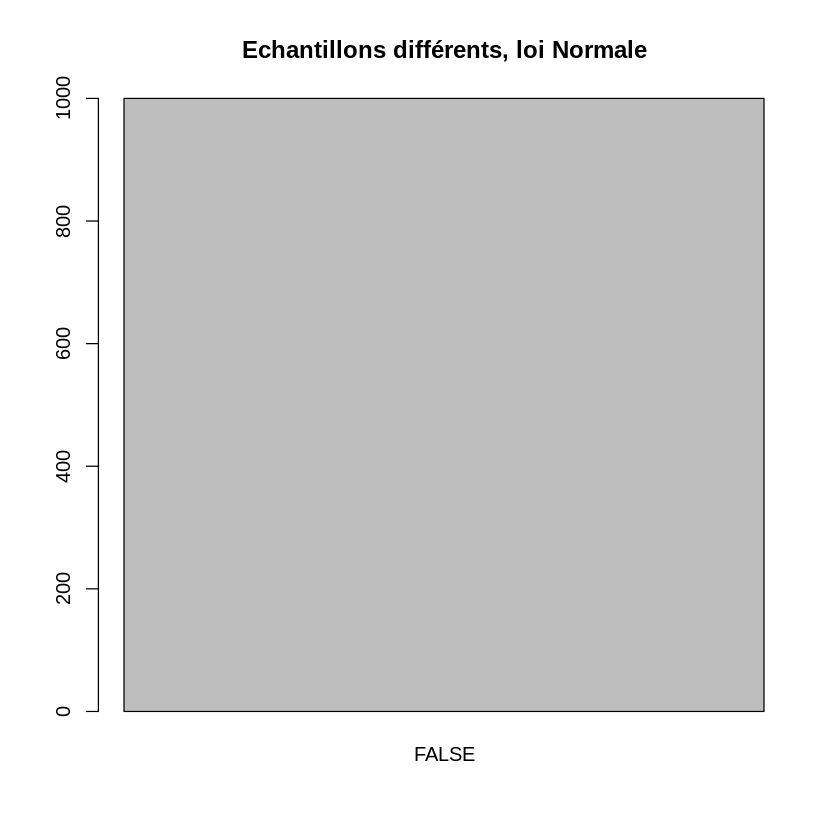

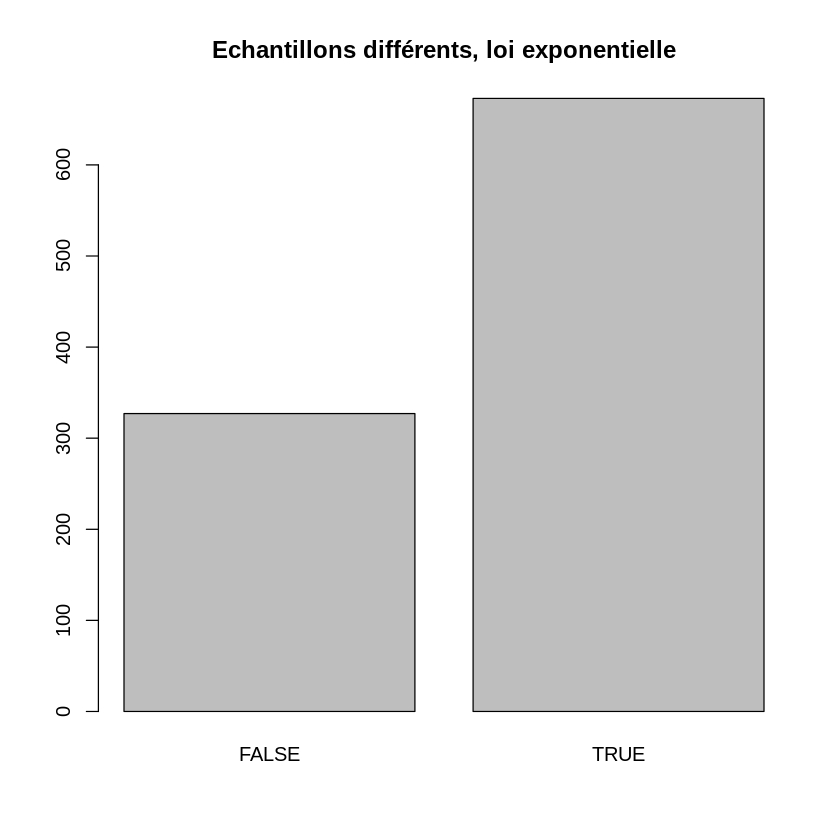

In [5]:
# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi normale
graph_pvalue(100,"different",1000,"normale")

# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi exponentielle
graph_pvalue(100,"different",1000,"exponentielle")

Lorsque l’on compare deux populations différentes de grands échantillons (n=100) et suivant
une loi normale le test de Student rejette systématiquement l’hypothèse H0. En revanche, si les
deux échantillons suivent une loi exponentielle dans ce cas, le test de Student se trompe souvent
(H0 n’est pas rejetée dans la majorité des cas ce qui correspond à une réponse fausse du test).


**Quatrième exemple **: Simulons 1000 couples de deux échantillons appartenant à deux populations
différentes et de petite taille (n=5) et suivant une loi normale (testons la population A
contre la C) ou une loi exponentielle (Testons la populations B contre la D)



In [6]:
# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi normale
graph_pvalue(5,"different",1000,"normale")

# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi exponentielle
graph_pvalue(5,"different",1000,"exponentielle")

Lorsque l’on compare deux populations différentes de petits échantillons (n=5) et suivant
une loi normale le test de Student rejette très souvent H0, mais il se trompe quand même. En
revanche, si les deux échantillons suivent une loi exponentielle dans ce cas, le test de Student
se trompe dans la grande majorité des cas (H0 n’est pas rejetée dans la majorité des cas ce qui
correspond à une réponse fausse du test).


**Pour conclure : la puissance du test de Student dépend fortement de la taille de l’échantillon,
plus elle est grande et plus le test est puissance. Lorsque la taille de l’échantillon
est faible, on observe également que la condition de normalité des données améliore la
puissance du test.**